<table align="left"  width="100%"> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="35%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Maksim Dimitrijev (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

<h1> <font color="blue"> Solutions for </font>  Multiqubit operations </h1>

<a id="task1"></a>
<h3> Task 1 </h3>

Suppose that our quantum computer has architecture like Melbourne device seen on picture. Connections between numbers of qubits show between which qubits controlled operations and $\qgate{SWAP}$ are allowed.

Perform Hadamard operation on qubit 0 and swap it sequentially to qubit 8, and perform a $\qgate{CNOT}$ operation with qubit 7.

<img src="../images/10_ibmq_systems.jpg" width="75%">

<h3> Solution </h3>

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(14)
creg = ClassicalRegister(14)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.h(qreg[0])
mycircuit.swap(qreg[0],qreg[1])
mycircuit.swap(qreg[1],qreg[2])
mycircuit.swap(qreg[2],qreg[3])
mycircuit.swap(qreg[3],qreg[4])
mycircuit.swap(qreg[4],qreg[5])
mycircuit.swap(qreg[5],qreg[6])
mycircuit.swap(qreg[6],qreg[8])
mycircuit.cx(qreg[8],qreg[7])
mycircuit.swap(qreg[6],qreg[8])
mycircuit.swap(qreg[5],qreg[6])
mycircuit.swap(qreg[4],qreg[5])
mycircuit.swap(qreg[3],qreg[4])
mycircuit.swap(qreg[2],qreg[3])
mycircuit.swap(qreg[1],qreg[2])
mycircuit.swap(qreg[0],qreg[1])

mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit)
print(counts)
mycircuit.draw(output='mpl')

<a id="task3"></a>
<h3> Task 3 </h3>

Create a method named `fredkin` and implement Fredkin gate using $\qgate{CNOT}$ and $\qgate{CCNOT}$ operators. Use unitary simulator to check the unitary matrix corresponding to your circuit. (Follow the Qiskit order.)

<h3> Solution </h3>

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def fredkin(): # Applies fredkin gate to the input using CX and CCX gates.    
    circuit = QuantumCircuit(3)
    circuit.cx(0,1)
    circuit.ccx(2,1,0)
    circuit.cx(0,1)
    return circuit

  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


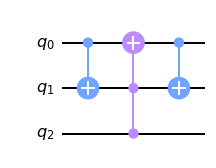

In [11]:
circuit = fredkin()

job = execute(circuit,Aer.get_backend('unitary_simulator'),shots=1)
u=job.result().get_unitary(circuit,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

circuit.draw(output="mpl")